In [71]:
import pandas as pd
from sklearn import preprocessing, metrics, svm, tree
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

le = preprocessing.LabelEncoder()
gnb = GaussianNB()
svm_ovo = svm.SVC(decision_function_shape='ovo')
svm_ovr = svm.SVC(decision_function_shape='ovr')
svm_lin = svm.LinearSVC(max_iter = 5000)
nc = NearestCentroid()
dt = tree.DecisionTreeClassifier()
rf = RandomForestClassifier(random_state=2021)
rf_bin = RandomForestClassifier(random_state=2021)
lr = LogisticRegression(max_iter=10000, solver='lbfgs')

dataset = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

#print(dataset)

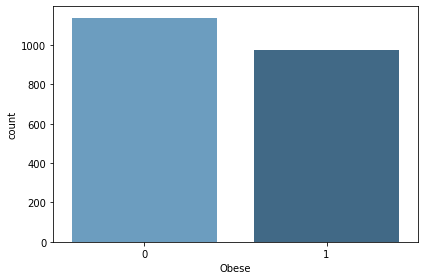

0       0
1       0
2       0
3       0
4       0
       ..
2106    1
2107    1
2108    1
2109    1
2110    1
Name: Obese, Length: 2111, dtype: int64


In [72]:
#for binary classification
weight_map = { 'Normal_Weight':0, 'Overweight_Level_I':0,
               'Overweight_Level_II':0, 'Obesity_Type_I':1,
               'Obesity_Type_II':1, 'Obesity_Type_III':1, 'Insufficient_Weight':0}
dataset['Obese'] = dataset_raw['NObeyesdad'].map(weight_map)
sns.countplot(x="Obese",                  
                 palette="Blues_d", 
                 order=dataset['Obese'].value_counts().index,                 
                 data=dataset)
# show figure & plots
plt.tight_layout()
plt.show()

dataset["SCC"] = le.fit_transform(dataset["SCC"])
dataset["SMOKE"] = le.fit_transform(dataset["SMOKE"])
dataset["Gender"] = le.fit_transform(dataset["Gender"]) 
dataset["family_history_with_overweight"] = le.fit_transform(dataset["family_history_with_overweight"])
dataset["FAVC"] = le.fit_transform(dataset["FAVC"])
dataset["NObeyesdad"] = le.fit_transform(dataset["NObeyesdad"])
dataset["CAEC"] = le.fit_transform(dataset["CAEC"])
dataset["CALC"] = le.fit_transform(dataset["CALC"])
dataset["MTRANS"] = le.fit_transform(dataset["MTRANS"])


minVal = min(dataset["Age"]);
maxVal = max(dataset["Age"]);

dataset["Age"] = (dataset["Age"] - minVal) / ( maxVal - minVal )

target = dataset['NObeyesdad']
target_bin = dataset['Obese']

print(target_bin)

dataset = dataset.drop(['Height', 'Weight', 'NObeyesdad','Obese'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(dataset,target, test_size=0.2,random_state=104)# 80% training and 20% test
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(dataset,target_bin, test_size=0.2,random_state=104)# 80% training and 20% test

# print(dataset)
# print(dataset.mean())
# print(dataset.std())
# print(dataset.mode())
# print(dataset.skew())


Accuracy RandomForest: 0.8794326241134752
Confusion matrix:
 [[51  4  0  0  0  0  0]
 [ 2 46  1  0  0  1  1]
 [ 0  1 60  2  0  1  3]
 [ 0  2  1 63  0  0  3]
 [ 0  1  0  0 68  0  0]
 [ 0  5  4  2  0 46  2]
 [ 4  3  5  2  0  1 38]]


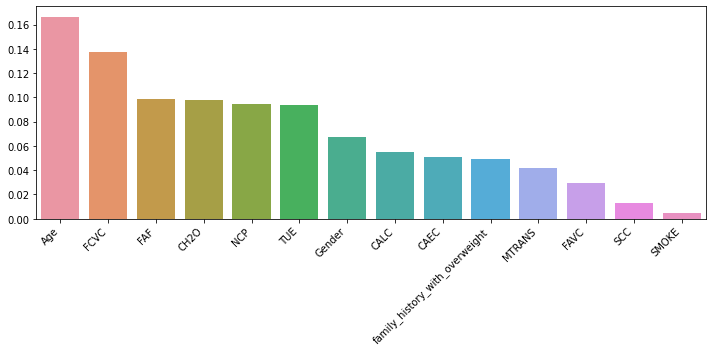

In [73]:
rf.fit(X_train, y_train) 

y_pred = rf.predict(X_test)

print("Accuracy RandomForest:",accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

feature_imp = pd.Series(rf.feature_importances_, index=dataset.columns).sort_values(ascending=False)
fig = plt.figure(figsize=(10, 5))

# Creating a bar plot
sns.barplot(x=feature_imp.index, y=feature_imp)

# Add labels to your graph
plt.xticks(rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

# # create features list
# features_list = dataset.columns
# features_list = features_list.tolist()

# # Get numerical feature importances
# importances = list(rf.feature_importances_)
# # List of tuples with variable and importance
# feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features_list, importances)]

# # Sort the feature importances by most important first
# feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# # Print out the feature and importances 
# print("\nTop 10 Features:")
# display_top = [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances[:10]]

# # Sort the feature importances by least important first
# feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = False)
# # Print out the feature and importances 
# print("\nBottom 10 Features:")
# display_bottom = [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances[:10]]

In [80]:
rf_bin.fit(X_train_bin, y_train_bin) 

y_pred_bin = rf_bin.predict(X_test_bin)

print("Accuracy RandomForest (binary):",accuracy_score(y_test_bin, y_pred_bin))
print("Confusion matrix:\n", confusion_matrix(y_test_bin, y_pred_bin))


Accuracy RandomForest (binary): 0.9408983451536643
Confusion matrix:
 [[205  13]
 [ 12 193]]


In [76]:
gnb.fit(X_train, y_train) 

y_pred = gnb.predict(X_test)

print("Accuracy gnb:",accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy gnb: 0.5933806146572104
Confusion matrix:
 [[39  1  7  8  0  0  0]
 [31  7  6  2  0  3  2]
 [ 0  2 42 20  0  1  2]
 [ 0  1  0 67  0  0  1]
 [ 1  0  0  0 68  0  0]
 [ 2  5 19 16  0 17  0]
 [ 4  3 11 23  0  1 11]]


In [79]:
svm_ovo.fit(X_train, y_train)

y_pred = svm_ovo.predict(X_test)

print("Accuracy svm_ovo:",metrics.accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy svm_ovo: 0.6903073286052009
Confusion matrix:
 [[47  3  4  1  0  0  0]
 [15 20  3  1  1 10  1]
 [ 1  0 44 13  1  2  6]
 [ 0  2  2 63  0  0  2]
 [ 0  1  0  0 68  0  0]
 [ 2  7 17  9  0 24  0]
 [ 2  4  8 11  1  1 26]]


In [ ]:
svm_ovr.fit(X_train, y_train)

y_pred = svm_ovr.predict(X_test)

print("Accuracy svm_ovr:",metrics.accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

In [ ]:
svm_lin.fit(X_train, y_train)

y_pred = svm_lin.predict(X_test)

print("Accuracy svm_lin:",metrics.accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

In [ ]:
nc.fit(X_train, y_train)

y_pred = nc.predict(X_test)

print("Accuracy nc:",metrics.accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

In [ ]:
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
print("Accuracy dt:",metrics.accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

In [ ]:
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print("Accuracy dt:",metrics.accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))